# A simple die

In [1]:
import stormvogel.model
import stormvogel.visualization
import stormvogel.show
import stormvogel.mapping
import stormpy

We will show off the API by creating a simple six-sided die.

In [2]:
# Create a new model with the name "Die"
dtmc = stormvogel.model.new_dtmc("Die")

init = dtmc.get_initial_state()

# From the initial state, add the transition to 6 new states with probability 1/6th.
init.set_transitions(
    [(1 / 6, dtmc.new_state(f"rolled{i}", {"rolled": i})) for i in range(1, 7)]
)
dtmc.add_self_loops()
import ipywidgets as widgets
import IPython.display as ipd
import logging
parent_logger = logging.getLogger("parent")
parent_logger.setLevel(logging.DEBUG)
debug = widgets.Output()

vis = stormvogel.show.show(dtmc, debug_output=debug, save_and_embed=True, name="die")

In [3]:
stormpy_dtmc = stormvogel.mapping.stormvogel_to_stormpy(dtmc)

We can perform DTMC evolution, although it is not very interesting for this particular model...

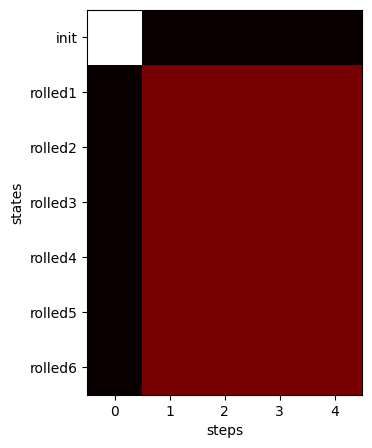

In [6]:
import stormvogel.lib
result = stormvogel.lib.dtmc_evolution(dtmc, steps=5)
labels = [s.labels[0] for s in dtmc.get_states().values()]
stormvogel.lib.display_value_iteration_result(result, 5, labels)